<a href="https://colab.research.google.com/github/shivang1234gupta/CelebrityProfiling/blob/master/CelebrityMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Preprocessing the data**

In [390]:
import pandas as pd
df=pd.read_csv('drive/My Drive/Random/Dataset.csv')
y=pd.read_csv('drive/My Drive/Random/Output.csv')

In [4]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git
import preprocess_kgptalkie as ps

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-g779fthj
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-g779fthj
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.0.5-cp36-none-any.whl size=4517 sha256=b50171fe455ff48d8e95cc319117080dc45cfe29d3939b9b5f47e6f653c494ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-t0sy4gu9/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [5]:
df['tweet'] = df['tweet'].apply(lambda x: str(x).lower())
df['tweet'] = df['tweet'].apply(lambda x: ps.cont_exp(x))

df['tweet'] = df['tweet'].apply(lambda x: ps.remove_special_chars(x))
df['tweet'] = df['tweet'].apply(lambda x: ps.remove_accented_chars(x))

In [6]:
df['tweet'] = df['tweet'].apply(lambda x: ps.remove_html_tags(x))


In [7]:
df['tweet'] = df['tweet'].apply(lambda x: ps.remove_urls(x))

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: ps.spelling_correction(x))

In [133]:
df['tweet'].head

<bound method NDFrame.head of 0        httpstcoi9kvh2in1s rt tmobile justinbieber and...
1        not too much drama but its still drama kickin ...
2        im happy to announce ill be watching your anno...
3        back in the 6 last night thank you toronto htt...
4        so excited for the announcement tomorrow from ...
                               ...                        
14494    loving being home after an amazing trip away w...
14495    last training session in rio for the aussie_ro...
14496    welcome to sri lanka pmoindia congratulations ...
14497    rt jkenney sad to learn that flora macdonald h...
14498    wisconsin the choice is clear who represents y...
Name: tweet, Length: 14499, dtype: object>

Using GloVe pretrained word embeddings

In [13]:
glove_vectors = dict()

In [14]:
import numpy as np


In [15]:
%%time

file = open('/content/drive/My Drive/glove.6B.100d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    
    word  = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
    
file.close()

CPU times: user 14 s, sys: 629 ms, total: 14.7 s
Wall time: 16 s


In [ ]:
glove_vectors

In [16]:
len(glove_vectors)

400000

In [17]:
vec_shape=100

In [18]:
def get_vec(x):
    arr = np.zeros(vec_shape)
    text = str(x).split()
    
    for t in text:
        try:
            vec = glove_vectors.get(t).astype(float)
            arr = arr + vec
        except:
            pass
        
    arr = arr.reshape(1, -1)[0]
    return arr/len(text)

Finally word embedded to vectors

In [ ]:
%%time
df['vec'] = df['tweet'].apply(lambda x: get_vec(x))

CPU times: user 31min 22s, sys: 1.61 s, total: 31min 23s
Wall time: 31min 25s


In [ ]:
df['vec']
df.fillna(value=0)
df['vec'].isnull().sum()

In [20]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(df['vec'], 'drive/My Drive/Random/preprocess.pkl') 

['drive/My Drive/Random/preprocess.pkl']

**Gender Classification of celebrity**

In [57]:
X=joblib.load('drive/My Drive/Random/preprocess.pkl') 

In [58]:
vec_shape=100
X = np.concatenate(X, axis = 0).reshape(-1, vec_shape)

In [59]:
type(X)

numpy.ndarray

In [402]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y['gen'])

LabelEncoder()

In [403]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'female': 0, 'male': 1, 'nonbinary': 2}


In [404]:
import numpy as np
X_final=X
y_final=y['gen'].to_numpy()

In [405]:
np.all(np.isfinite(X_final))

True

In [406]:
np.any(np.isnan(X_final))

False

In [407]:
X_final.shape
#np.any(np.isnan(X_final))

(14499, 100)

In [408]:
X_final[0].shape

(100,)

In [409]:
from numpy import *
where_are_NaNs = isnan(X_final)
X_final[where_are_NaNs] = 0

In [410]:
X_final[X_final == inf] = 0

In [411]:
np.any(np.isnan(X_final))

False

In [412]:
np.all(np.isfinite(X_final))

True

In [413]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=40,test_size=.2)

In [414]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(solver = 'liblinear', multi_class='auto')


In [415]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
y_pred = clf.predict(X_test)

In [417]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.80      0.52      0.63       804
        male       0.84      0.95      0.89      2093
   nonbinary       0.00      0.00      0.00         3

    accuracy                           0.83      2900
   macro avg       0.54      0.49      0.51      2900
weighted avg       0.82      0.83      0.82      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [418]:
print(confusion_matrix(y_test, y_pred))

[[ 415  389    0]
 [ 103 1990    0]
 [   2    1    0]]


In [419]:
from sklearn.svm import LinearSVC

In [420]:
clf = LinearSVC(C=0.75)
clf.fit(X_train, y_train)

LinearSVC(C=0.75, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [427]:
y_pred = clf.predict(X_test)

In [422]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.79      0.61      0.69       804
        male       0.86      0.94      0.90      2093
   nonbinary       0.00      0.00      0.00         3

    accuracy                           0.85      2900
   macro avg       0.55      0.52      0.53      2900
weighted avg       0.84      0.85      0.84      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train data results

In [423]:
y_pred = clf.predict(X_train)

In [424]:
print(classification_report(y_train, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      female       0.79      0.61      0.69      3268
        male       0.86      0.94      0.90      8316
   nonbinary       0.00      0.00      0.00        15

    accuracy                           0.84     11599
   macro avg       0.55      0.52      0.53     11599
weighted avg       0.84      0.84      0.84     11599



In [428]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test,y_pred)

0.8458620689655172

So we can see that for gender Linear SVM produces best results and an accuracy of about test accuracy of 85% and train accuracy of 84%

**Fame Classification**

In [429]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y['fame'])

LabelEncoder()

In [430]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'rising': 0, 'star': 1, 'superstar': 2}


In [431]:
import numpy as np
X_final=X
y_final=y['fame'].to_numpy()

In [432]:
X_final.shape

(14499, 100)

In [433]:
from numpy import *
where_are_NaNs = isnan(X_final)
X_final[where_are_NaNs] = 0

In [434]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=40,test_size=.2)

In [435]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')


In [436]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [437]:
y_pred = clf.predict(X_test)

In [438]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      rising       0.00      0.00      0.00       139
        star       0.76      0.99      0.86      2175
   superstar       0.56      0.08      0.13       586

    accuracy                           0.75      2900
   macro avg       0.44      0.35      0.33      2900
weighted avg       0.68      0.75      0.67      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train data results

In [439]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      rising       0.60      0.01      0.01       469
        star       0.76      0.99      0.86      8715
   superstar       0.56      0.07      0.12      2415

    accuracy                           0.75     11599
   macro avg       0.64      0.35      0.33     11599
weighted avg       0.71      0.75      0.67     11599



In [440]:
from sklearn.svm import LinearSVC

In [441]:
from sklearn.svm import SVC

In [442]:
clf = LinearSVC(C=0.5)
clf.fit(X_train, y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [443]:
y_pred = clf.predict(X_test)

In [444]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      rising       0.00      0.00      0.00       139
        star       0.76      0.99      0.86      2175
   superstar       0.52      0.05      0.09       586

    accuracy                           0.75      2900
   macro avg       0.42      0.35      0.32      2900
weighted avg       0.67      0.75      0.66      2900



In [445]:
print(confusion_matrix(y_test, y_pred))

[[   0  138    1]
 [   1 2148   26]
 [   0  557   29]]


In [446]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [447]:
y_pred = clf.predict(X_test)

In [448]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      rising       0.00      0.00      0.00       139
        star       0.76      0.99      0.86      2175
   superstar       0.52      0.05      0.09       586

    accuracy                           0.75      2900
   macro avg       0.42      0.35      0.32      2900
weighted avg       0.67      0.75      0.66      2900



In [449]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test,y_pred)

0.7506896551724138

From above we can see that Logistic regression produced best results(comparing f1-score) and an test accuracy of about 75.41% (using logistic regression) and train accuracy of about 75%

**Occupation classification**

In [450]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y['occ'])

LabelEncoder()

In [451]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'creator': 0, 'manager': 1, 'performer': 2, 'politics': 3, 'professional': 4, 'religious': 5, 'science': 6, 'sports': 7}


In [452]:
import numpy as np
X_final=X
y_final=y['occ'].to_numpy()

In [453]:
from numpy import *
where_are_NaNs = isnan(X_final)
X_final[where_are_NaNs] = 0

In [454]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=40,test_size=.2)

In [455]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')


In [456]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [457]:
y_pred = clf.predict(X_test)

In [458]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     creator       0.50      0.39      0.44       469
     manager       0.67      0.03      0.05        75
   performer       0.66      0.83      0.73       818
    politics       0.67      0.74      0.70       234
professional       0.00      0.00      0.00        52
   religious       0.00      0.00      0.00         2
     science       0.33      0.04      0.08        67
      sports       0.85      0.88      0.86      1183

    accuracy                           0.72      2900
   macro avg       0.46      0.36      0.36      2900
weighted avg       0.69      0.72      0.69      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [459]:
classifier = SVC(kernel = 'rbf',gamma=0.7)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [460]:
y_pred = clf.predict(X_test)

In [461]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     creator       0.50      0.39      0.44       469
     manager       0.67      0.03      0.05        75
   performer       0.66      0.83      0.73       818
    politics       0.67      0.74      0.70       234
professional       0.00      0.00      0.00        52
   religious       0.00      0.00      0.00         2
     science       0.33      0.04      0.08        67
      sports       0.85      0.88      0.86      1183

    accuracy                           0.72      2900
   macro avg       0.46      0.36      0.36      2900
weighted avg       0.69      0.72      0.69      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [462]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [463]:
y_pred = clf.predict(X_test)

In [464]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     creator       0.50      0.39      0.44       469
     manager       0.67      0.03      0.05        75
   performer       0.66      0.83      0.73       818
    politics       0.67      0.74      0.70       234
professional       0.00      0.00      0.00        52
   religious       0.00      0.00      0.00         2
     science       0.33      0.04      0.08        67
      sports       0.85      0.88      0.86      1183

    accuracy                           0.72      2900
   macro avg       0.46      0.36      0.36      2900
weighted avg       0.69      0.72      0.69      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [465]:
classifier = SVC(kernel = 'linear', C=0.5,random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [466]:
y_pred = clf.predict(X_test)

In [467]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     creator       0.50      0.39      0.44       469
     manager       0.67      0.03      0.05        75
   performer       0.66      0.83      0.73       818
    politics       0.67      0.74      0.70       234
professional       0.00      0.00      0.00        52
   religious       0.00      0.00      0.00         2
     science       0.33      0.04      0.08        67
      sports       0.85      0.88      0.86      1183

    accuracy                           0.72      2900
   macro avg       0.46      0.36      0.36      2900
weighted avg       0.69      0.72      0.69      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [468]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test,y_pred)

0.7186206896551725

In [469]:
y_pred = clf.predict(X_train)

Train data accuracy

In [470]:
print(classification_report(y_train, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     creator       0.51      0.38      0.44      1867
     manager       0.83      0.02      0.04       251
   performer       0.68      0.83      0.75      3461
    politics       0.67      0.77      0.72       940
professional       0.00      0.00      0.00       186
   religious       0.00      0.00      0.00        17
     science       0.57      0.05      0.09       256
      sports       0.84      0.89      0.87      4621

    accuracy                           0.73     11599
   macro avg       0.51      0.37      0.36     11599
weighted avg       0.71      0.73      0.70     11599



So we can see that all classifier produce same accuracy of around 72% and train accuracy of 73%

**Age classification** (Using regression)

In [474]:
X_final.shape

(14499, 100)

In [475]:
y_final.shape

(14499,)

In [481]:
y_final=y['by'].to_numpy()

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=40)

In [496]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [497]:
y_pred = regressor.predict(X_test)

In [498]:
y_pred

array([1957.29687828, 1959.17780518, 1980.67819318, ..., 1974.20088072,
       1989.4244125 , 1971.37535231])

In [499]:
from sklearn import metrics

In [500]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.771039233194118
Mean Squared Error: 134.03988901313735
Root Mean Squared Error: 11.577559717537083


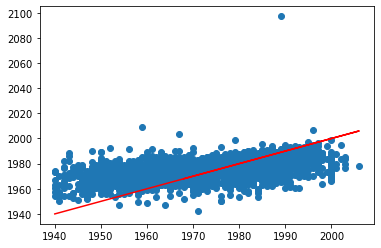

In [502]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')